## TFIM Eigenvalue of groundstate 

In [2]:
import qutip as qt
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.gridspec import GridSpec

In [12]:
# ===========
N = 6
J = 1.0
J_p_list = np.linspace(J, 0.0, 3000)
hx = 0.1
# ===========


def simulate(N, J, J_p, hx):
    cut_pos = N // 2 - 1
    sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()
    I2 = qt.qeye(2)

    def op_at(i, op):
        return qt.tensor([op if k == i else I2 for k in range(N)])

    Sx = [op_at(i, sx) for i in range(N)]
    Sy = [op_at(i, sy) for i in range(N)]
    Sz = [op_at(i, sz) for i in range(N)]

    def H_exchange(i):
        return (Sz[i] * Sz[i + 1])

    def H_trans(i):
        return Sx[i]

    H_cut_unit = H_exchange(cut_pos)
    H_exchange_unit = sum(H_exchange(i) for i in range(N-1) if i != cut_pos)
    H_trans_unit = sum(H_trans(i) for i in range(N))
    H_full = - J * H_exchange_unit - J_p * H_cut_unit - hx * H_trans_unit

    solver_opts = dict(store_states=False, progress_bar =None, rtol = 1e-6, atol=1e-8, nsteps=20000, )
    which = [0, 1, 2, 3, 4]
    E_all, psi_all = H_full.eigenstates(sparse=False, sort='low')
    E_pick = np.array([np.real_if_close(E_all[n], tol=1e-12) for n in which])
    psi_pick = [psi_all[n] for n in which]
    
    return E_pick, psi_pick

markers = ['o', '^', 's']

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')
mpl.rcParams.update({
    "axes.labelsize": 18,   # 軸ラベル
    "xtick.labelsize": 16,  # 目盛り数字
    "ytick.labelsize": 16,
    "lines.linewidth": 2.2, # 線の太さ
    "axes.titlesize": 16,
})

def label_at(ax, x, y, text, *, coord='data', dx_pt = 8, fontsize=14, color=None):
    kw = dict(ha='left', va='center', fontsize=fontsize, xytext=(dx_pt, 0), textcoords='offset points', path_effects=[pe.withStroke(linewidth = 3, foreground='white')], clip_on=False, zorder=6)
    if color is not None:
        kw['color'] = color
    if coord == 'axes':
        ax.annotate(text, xy = (x, y), xycoords = ax.transAxes, **kw)
    else:
        ax.annotate(text, xy = (x, y), xycoords = 'data', **kw)

def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
    ax.tick_params(which='minor', length=minor_len, width=width)

# result = [simulate(N=N, J=J, J_p = J_p, hx = hx) for J_p in J_p_list]
results = np.array([simulate(N, J, J_p, hx) for J_p in J_p_list])
En_list = np.stack([r[0] for r in results], axis=0)
psi_n_list = [r[1] for r in results]

J_idx = [0, 2984, 2995, 2999]
for idx in J_idx:
    print(f"n = 0, J_idx = {idx}, J={J_p_list[idx]}", psi_n_list[idx][0])
    print(f"n = 2, J_idx = {idx}, J={J_p_list[idx]}", psi_n_list[idx][1])
    print(f"n = 3, J_idx = {idx}, J={J_p_list[idx]}", psi_n_list[idx][2])

# result = np.asarray(result)

n = 0, J_idx = 0, J=1.0 Quantum object: dims=[[2, 2, 2, 2, 2, 2], [1]], shape=(64, 1), type='ket', dtype=Dense
Qobj data =
[[7.04449121e-01]
 [3.52241670e-02]
 [1.76562127e-02]
 [2.66094374e-03]
 [1.76232204e-02]
 [8.88850398e-04]
 [8.97071481e-04]
 [4.40280093e-04]
 [1.76232204e-02]
 [8.84475056e-04]
 [4.45266160e-04]
 [1.32580528e-04]
 [8.91612578e-04]
 [1.10567306e-04]
 [1.87699377e-04]
 [2.66094374e-03]
 [1.76562127e-02]
 [8.85571632e-04]
 [4.44716834e-04]
 [1.10567306e-04]
 [4.45266160e-04]
 [4.43050797e-05]
 [6.64021137e-05]
 [8.88850394e-04]
 [8.97071481e-04]
 [8.86083316e-05]
 [6.64021137e-05]
 [8.84475053e-04]
 [1.87699377e-04]
 [8.85571629e-04]
 [1.76508066e-03]
 [3.52241669e-02]
 [3.52241670e-02]
 [1.76508067e-03]
 [8.85571632e-04]
 [1.87699378e-04]
 [8.84475056e-04]
 [6.64021138e-05]
 [8.86083316e-05]
 [8.97071478e-04]
 [8.88850398e-04]
 [6.64021138e-05]
 [4.43050797e-05]
 [4.45266158e-04]
 [1.10567306e-04]
 [4.44716832e-04]
 [8.85571629e-04]
 [1.76562126e-02]
 [2.66094374e

n=0: E = -5.020016662087919
n=1: E = -5.020014682087918
n=2: E = -3.1894672047917254
n=3: E = -3.1894652247917183
n=4: E = -3.109357210763831


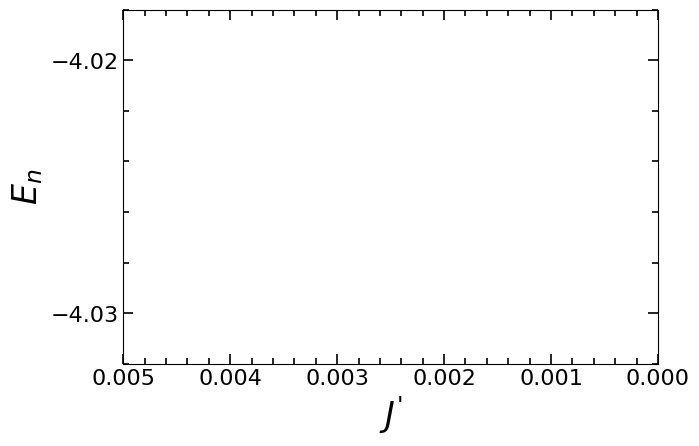

In [13]:
fig, ax = plt.subplots(figsize=(6.9, 4.6))
ax.set_xlim(J_p_list.max(), J_p_list.min())
ax.set_xlim(0.005, 0.0)
ax.set_ylim(-4.032, -4.018)
ax.set_xlabel(r"$J^'$", fontsize=24)
# ax.set_ylim(result.min() - 0.1, result.max() + 0.1)
ax.set_ylabel(r"$E_n$", fontsize=24)
ax.xaxis.set_major_locator(MultipleLocator(0.001))
ax.xaxis.set_minor_locator(MultipleLocator(0.0005))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
inward_ticks(ax)

# num_levels = Ek_list.shape[1]
# print(num_levels)
# for n in range(min(num_levels, 5)):
    # ax.plot(J_p_list, Ek_list[:, n], marker='o', markersize=6.0, label=f"n={n}")

Ek_at_0 = simulate(N, J, J_p = 1.0, hx=hx)
for n in range(5):
    print(f"n={n}: E = {Ek_at_0[0][n]}")
    

# ax.legend(loc='lower right', fontsize=12)

OUTDIR = Path("../charts/TFIM"); 
# fig.savefig(OUTDIR / f"E0_hx_{hx}_N_{N}_J_{J}_dist_rev_expand.pdf", bbox_inches="tight", dpi=300)
plt.show()